Libraries needed!

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

Strcutures of Discriminative patterns using SMARTSminer on active Cluster 0-11 vs inactive Cluster 34

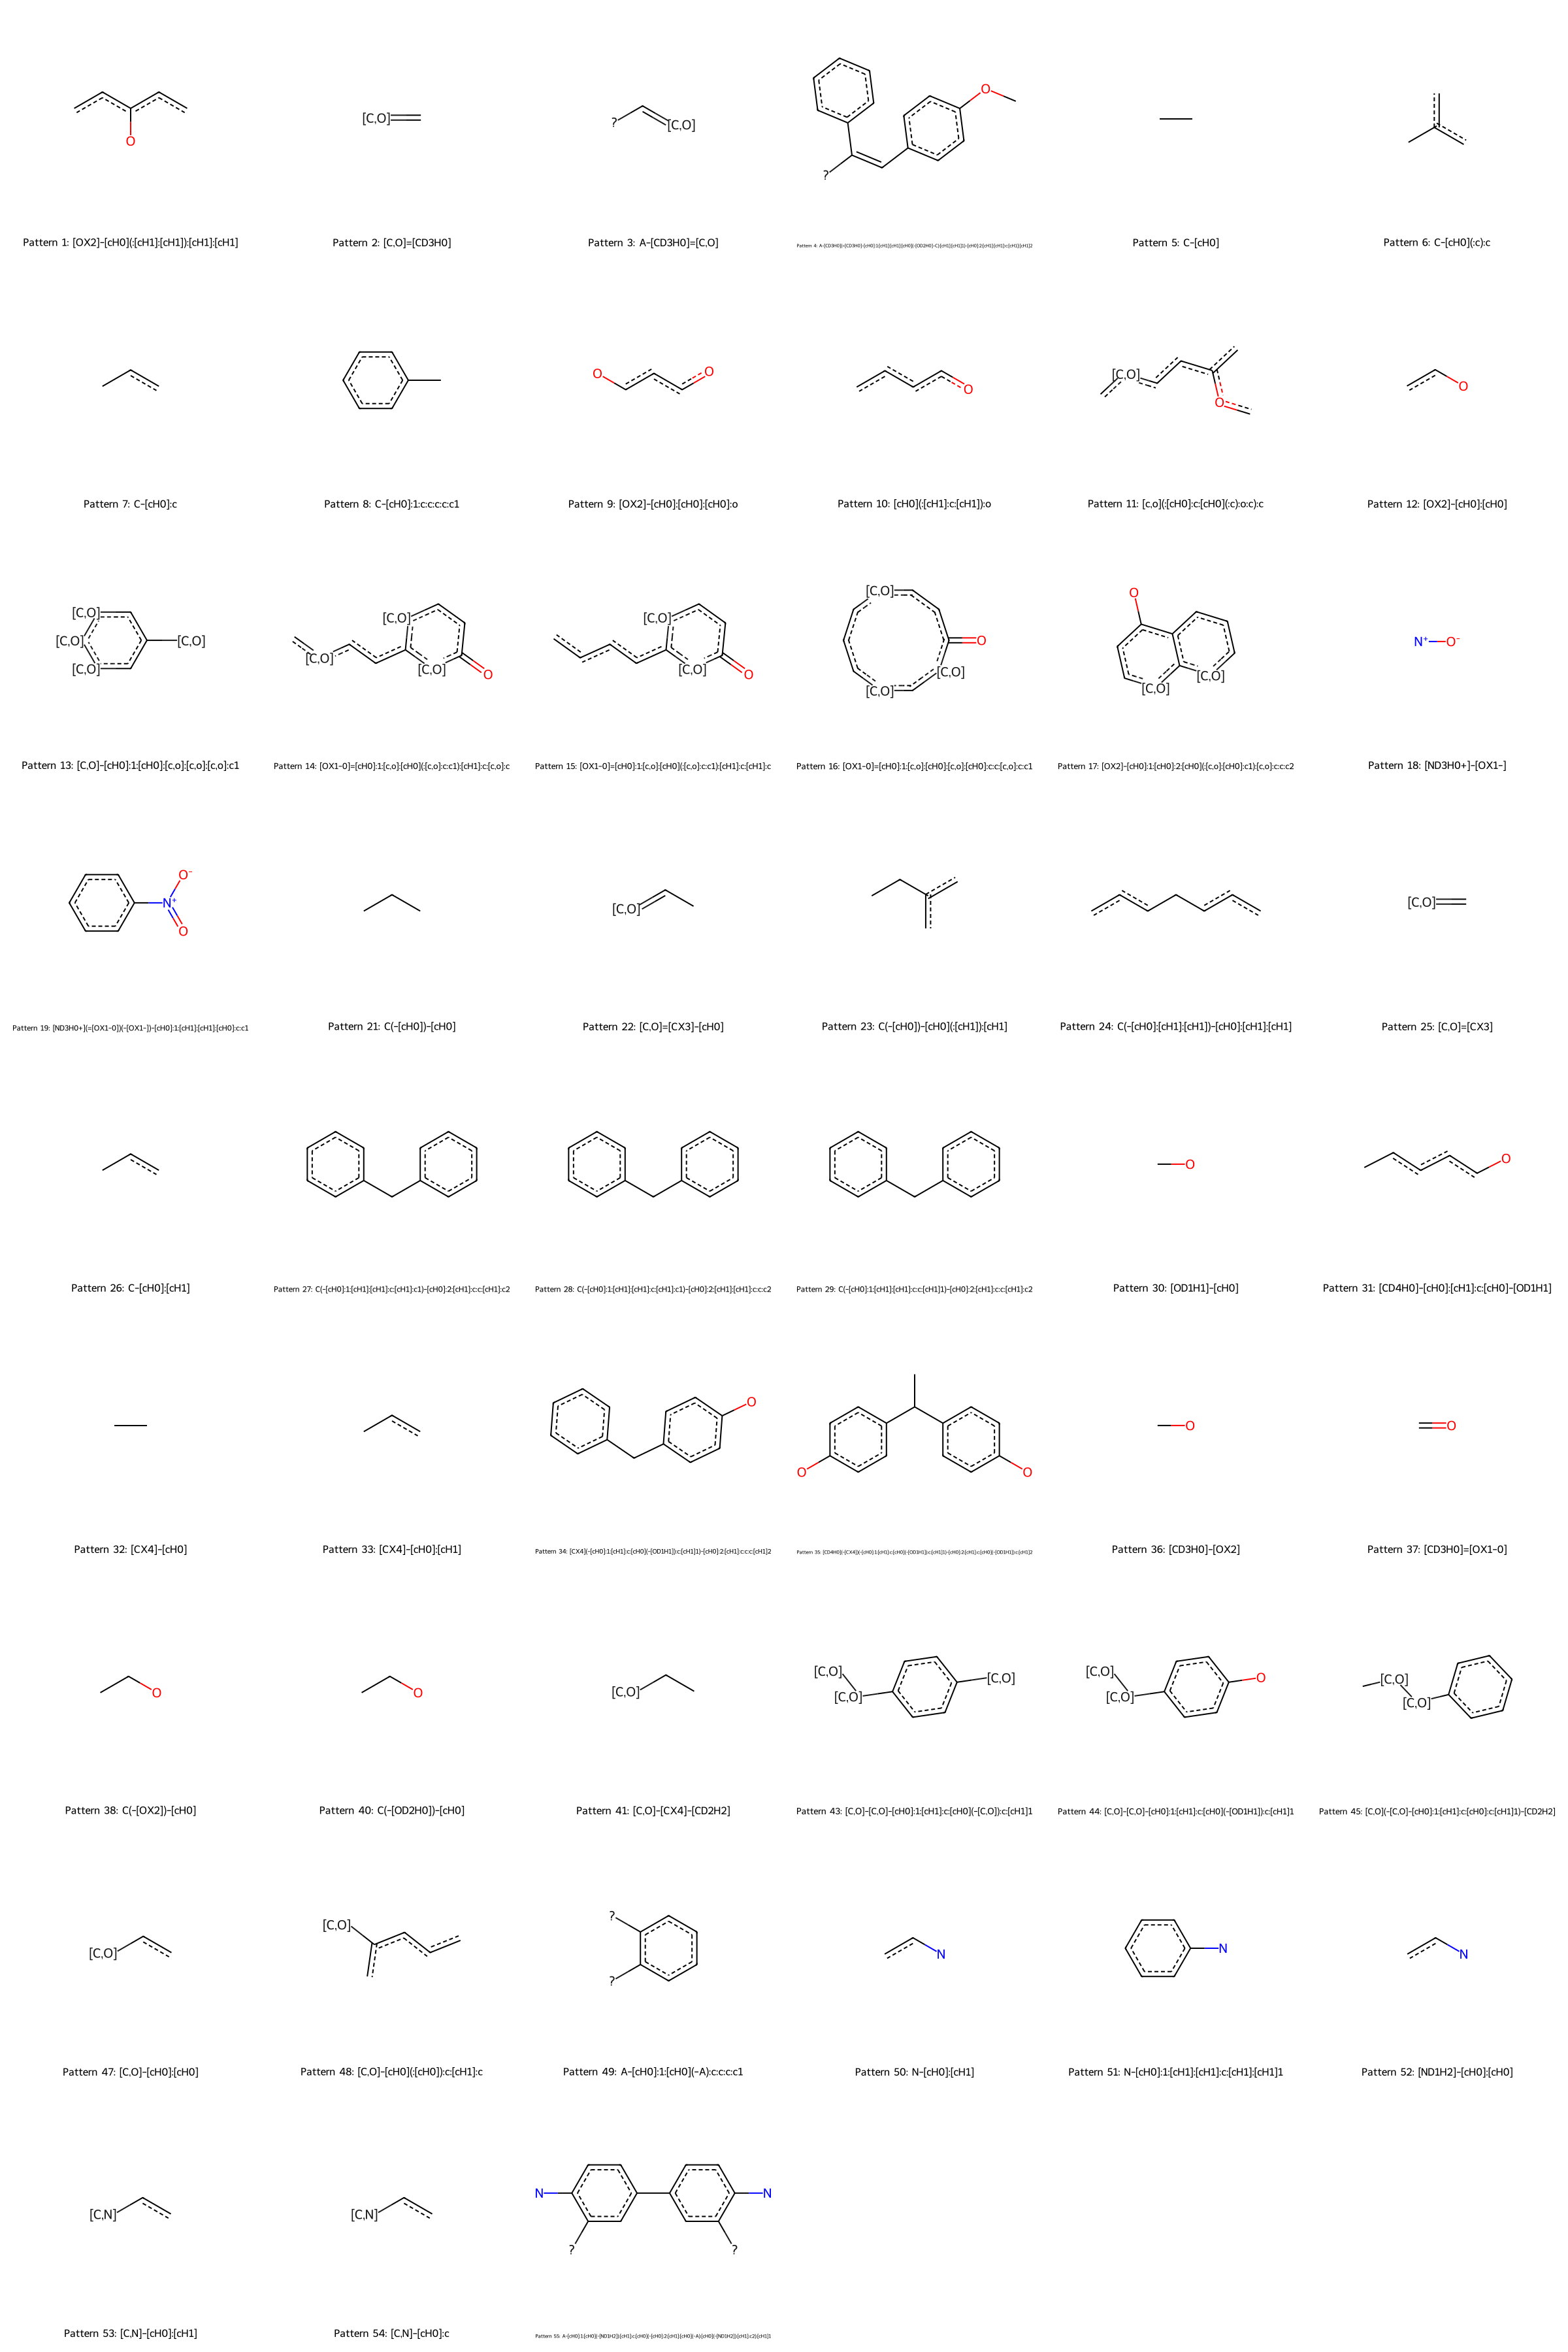

Displayed 51 unique patterns out of 55 total patterns


In [4]:
def display_smarts_from_excel(file_path, sheet_name="InactClust34", smarts_column=1):
    # Read Excel file
    patterns_df = pd.read_excel(file_path, sheet_name=sheet_name)
    
    # Get SMARTS patterns from specified column
    smarts_list = patterns_df.iloc[:, smarts_column-1]
    
    # Convert SMARTS to molecules, removing duplicates
    mols = []
    labels = []
    unique_smarts = set()
    
    for idx, smarts in enumerate(smarts_list, 1):
        if isinstance(smarts, str) and smarts not in unique_smarts:
            mol = Chem.MolFromSmarts(smarts)
            if mol:
                mols.append(mol)
                labels.append(f"Pattern {idx}: {smarts}")
                unique_smarts.add(smarts)
    
    # Display grid of molecules with no limit on number displayed
    if mols:
        # Set a relatively large molsPerRow value to avoid truncation
        # Use a larger subImgSize for better visibility
        img = Draw.MolsToGridImage(
            mols,
            molsPerRow=6,
            subImgSize=(400, 400),
            legends=labels,
            maxMols=len(mols)  # Ensure all molecules are shown
        )
        display(img)
        print(f"Displayed {len(mols)} unique patterns out of {len(smarts_list)} total patterns")

display_smarts_from_excel("Data/Clustered_DP.xlsx")

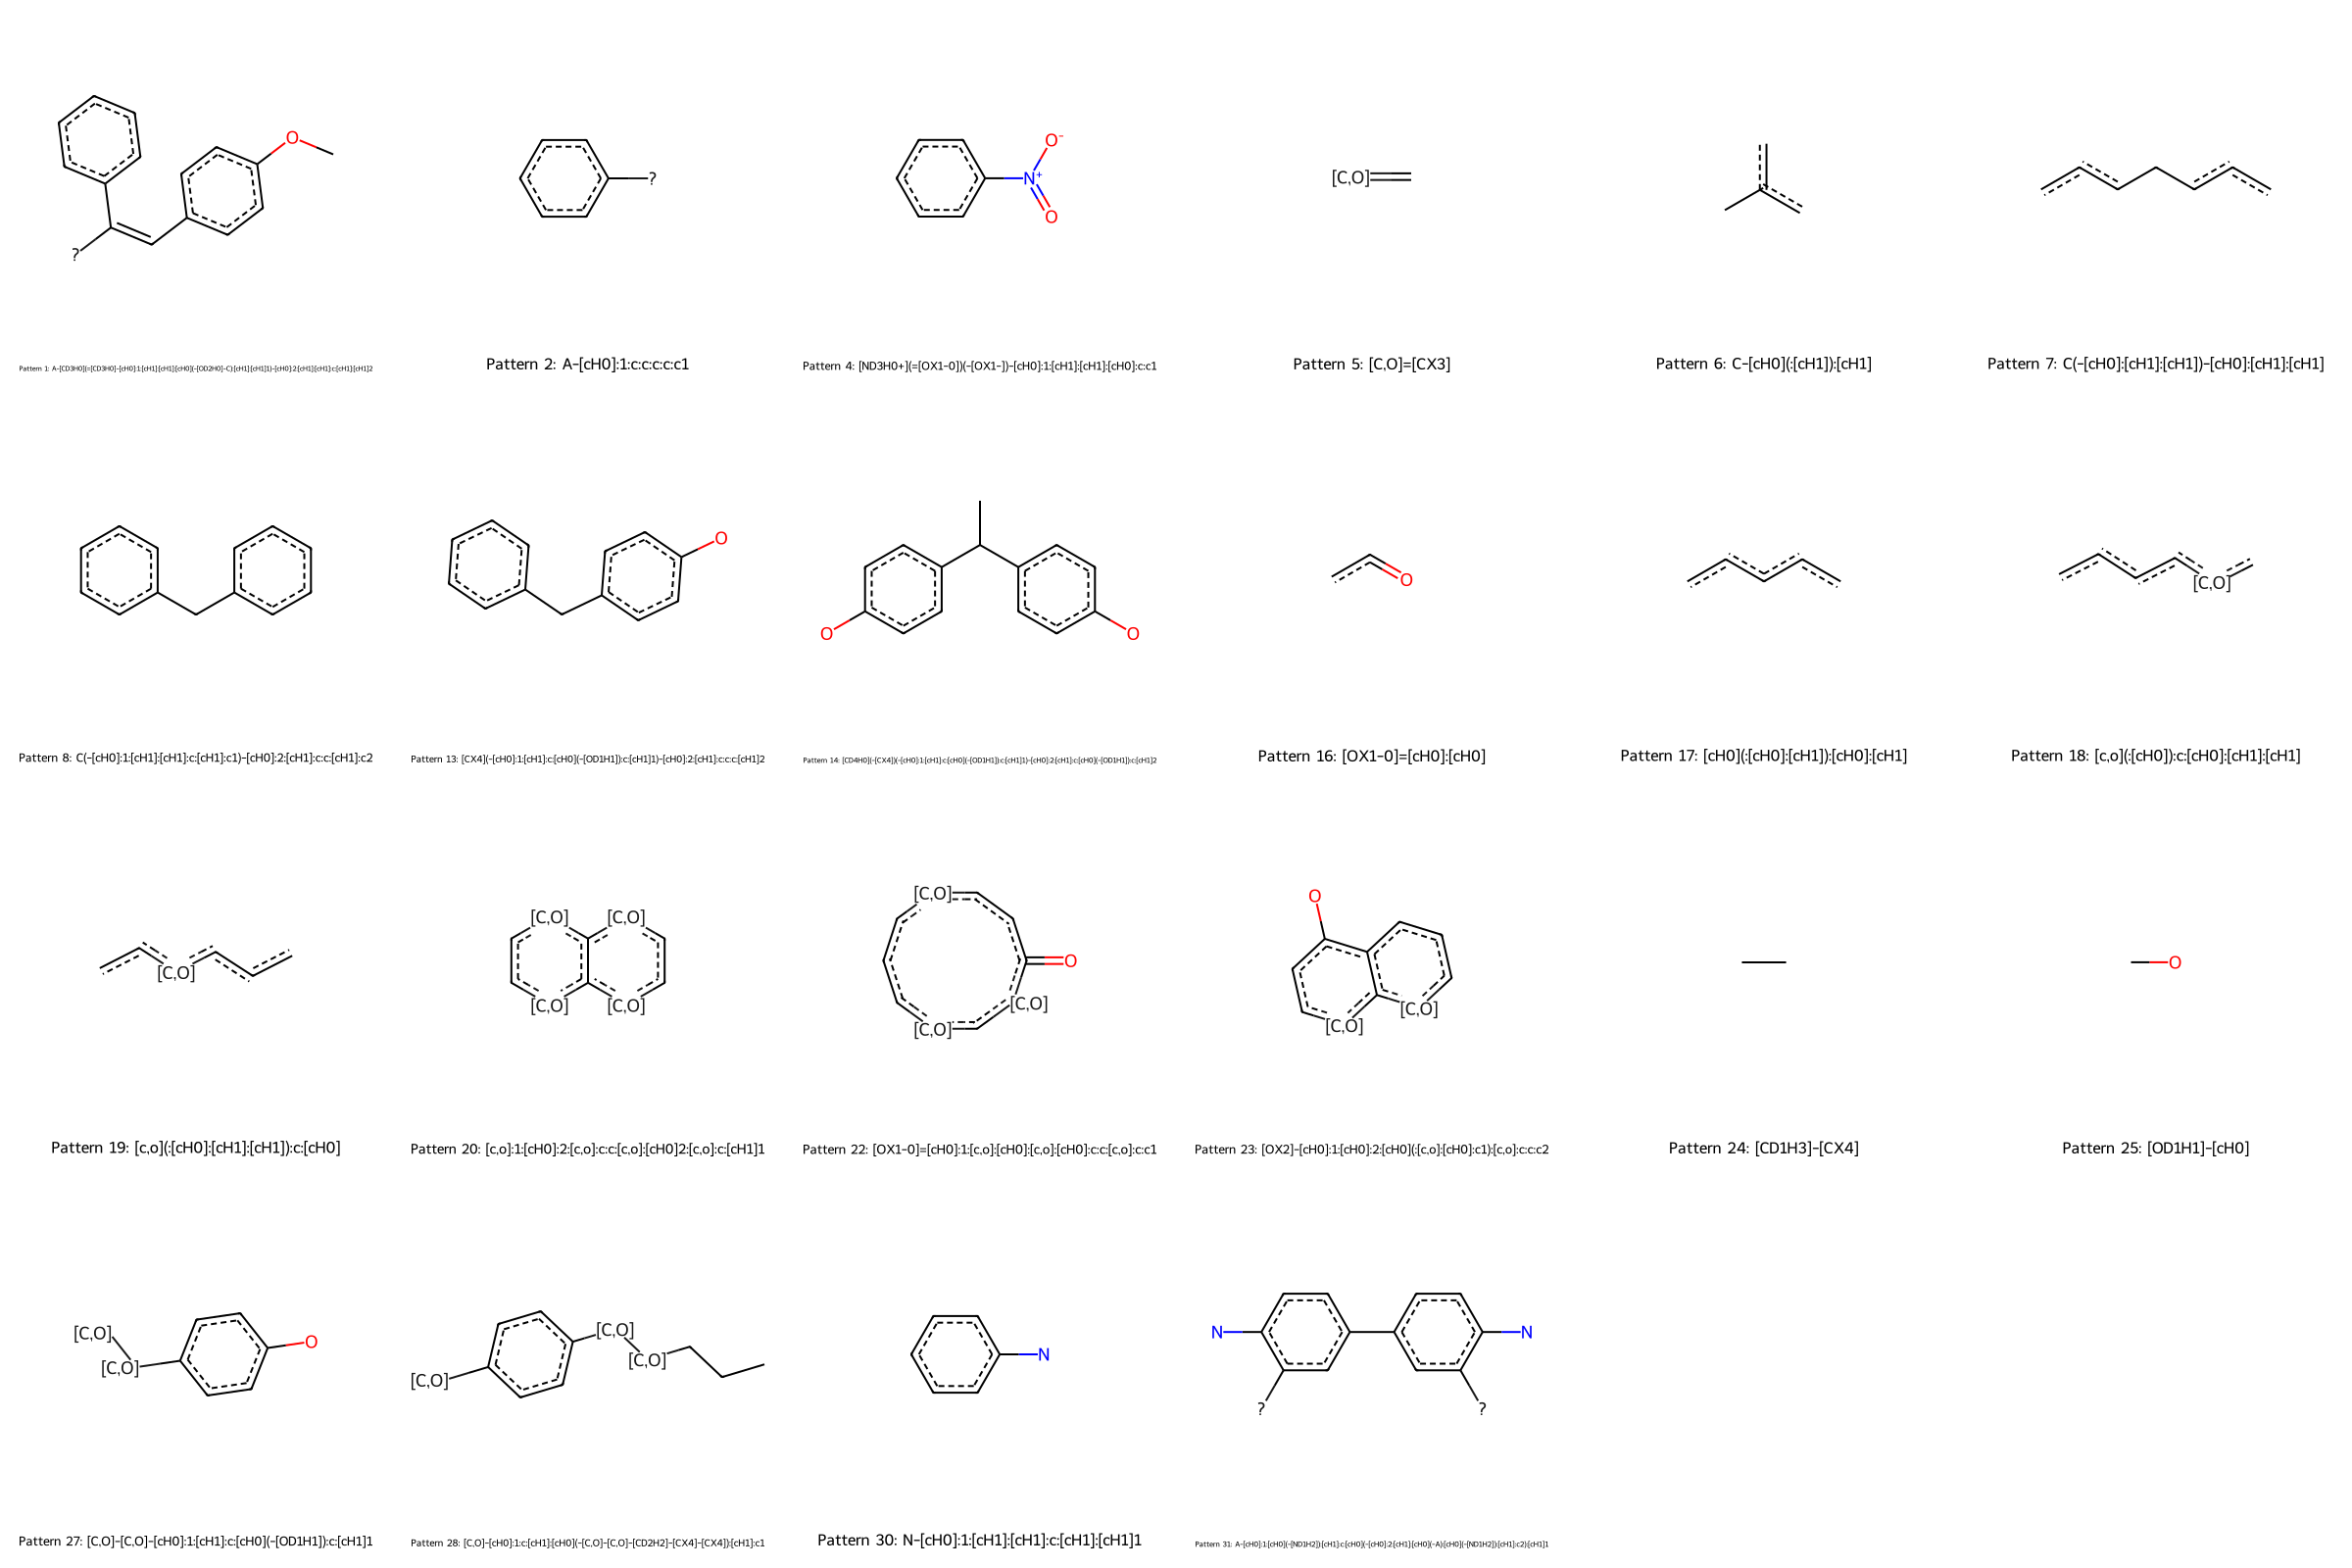

Displayed 22 unique patterns out of 31 total patterns
Kept patterns at original indices: [1, 2, 4, 5, 6, 7, 8, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 30, 31]


In [8]:
def display_smarts_from_excel(file_path, smarts_column=1):
    # Read Excel file
    patterns_df = pd.read_excel(file_path)
    
    # Get SMARTS patterns from specified column
    smarts_list = patterns_df.iloc[:, smarts_column-1].dropna().tolist()
    
    # Convert SMARTS to molecules, removing duplicates by structure
    mols = []
    labels = []
    unique_canonical_smiles = set()  # Use canonical SMILES to detect duplicates
    original_indices = []  # Track original indices for reference
    
    for idx, smarts in enumerate(smarts_list, 1):
        if isinstance(smarts, str) and smarts.strip():
            try:
                # Convert SMARTS to molecule
                mol = Chem.MolFromSmarts(smarts.strip())
                if mol:
                    # Try to convert to a canonical representation
                    # For SMARTS patterns, we'll use a fingerprint as a proxy for "sameness"
                    fp = Chem.RDKFingerprint(mol)
                    fp_str = fp.ToBitString()
                    
                    if fp_str not in unique_canonical_smiles:
                        mols.append(mol)
                        labels.append(f"Pattern {idx}: {smarts}")
                        unique_canonical_smiles.add(fp_str)
                        original_indices.append(idx)
            except:
                # Skip invalid SMARTS patterns
                continue
    
    # Display grid of molecules
    if mols:
        # Set a relatively large molsPerRow value to avoid truncation
        img = Draw.MolsToGridImage(
            mols,
            molsPerRow=6,
            subImgSize=(400, 400),
            legends=labels,
            maxMols=len(mols)  # Ensure all molecules are shown
        )
        display(img)
        print(f"Displayed {len(mols)} unique patterns out of {len(smarts_list)} total patterns")
        print(f"Kept patterns at original indices: {original_indices}")
    else:
        print("No valid SMARTS patterns found in the specified column.")

# Call the function
display_smarts_from_excel("Data/Clustered_DP.xlsx")